Зачетная работа по предмету “Системы компьютерной математики”


**Тема 32. Нахождение корня нелинейного уравнения с помощью метода обратной квадратичной интерполяции**


Выполнил Константинов Илья Георгиевич


Реализовать метод обратной квадратичной интерполяции для нахождения корня нелинейного уравнения.
Привести примеры уравнений, для которых процесс а) сходится сверхлинейно; б) сходится с линейной скоростью; в) не сходится.
Ваша программа должна строить графики этих функций, выдавать найденный корень и количество вычислений значений функции.

**Теоритическая часть**


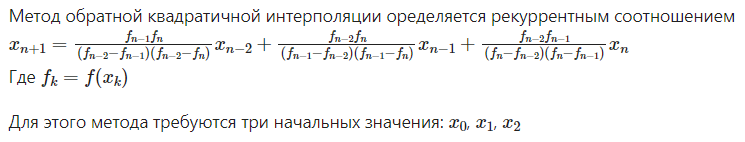

**Реализация:**

Подключаем библиотеки:


In [4]:
import matplotlib.pyplot as plt
import numpy as np

Реализуем метод обратной квадратичной интерполяции

In [13]:
def a(x0, x1, x2, f):
    
    def f1(x0, x1, x2):
        return (f(x0) * f(x2) * x1) / ((f(x1) - f(x0)) * (f(x1) - f(x2)))
    def f2(x0, x1, x2):
        return (f(x0) * f(x1) * x2) / ((f(x2) - f(x0)) * (f(x2) - f(x1)))
    def f0(x0, x1, x2):
        return (f(x1) * f(x2) * x0) / ((f(x0) - f(x1)) * (f(x0) - f(x2)))
    count_x = [x0, x1, x2]
    i = 2
    while f(count_x[i]) != 0 and f(count_x[i]) != f(count_x[i - 1]) and f(count_x[i - 1]) != f(count_x[i - 2]) and f(count_x[i - 2]) != f(count_x[i]) and i < 100000:
        count_x.append(f0(count_x[i - 2], count_x[i - 1], count_x[i]) + f1(count_x[i - 2], count_x[i - 1], count_x[i]) + f2(count_x[i - 2], count_x[i - 1], count_x[i]))
        i += 1
    if f(count_x[i]) != 0:
        c = 0
    else:
        s = True
        l = 1000000
        for j in range(3, i):
            g = abs(count_x[j] - count_x[i]) / abs(count_x[j - 1] - count_x[i])
            if l < g: l = g
            else:
                s = False
                break
        if s: c = 2
        else: c = 1
    if (c != 0): return count_x[-1], i, c
    else: return None, i, c

Уравнение для которого процесс сходится линейно



In [22]:
def f0(x):
    return x ** 2

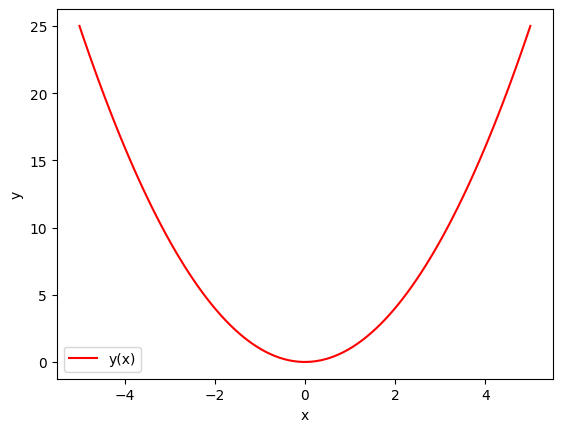

Корень уравнения 0.0
Количество вычеслений 277


In [25]:
x = np.linspace(-5, 5, 100)
y = f0(x)

fig, ax = plt.subplots()
ax.plot(x, y, color="red", label="y(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()
r, count, c = a(6, 5, 4, f0)
print("Корень уравнения " + str(r))
print("Количество вычеслений " + str(count))

Уравнение для которого процесс не сходится


In [32]:
def f1(x):
    return x **5 + x ** 3 - 8

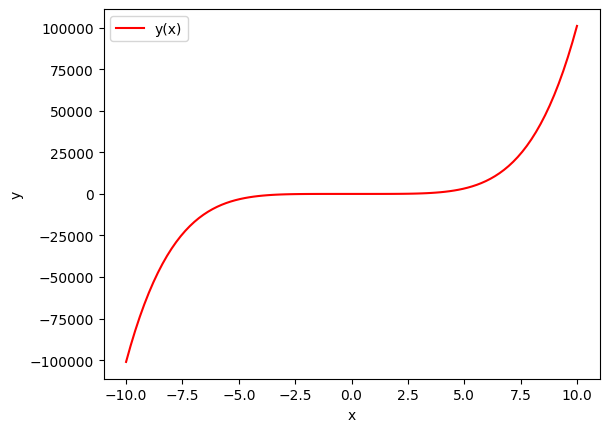

Корень уравнения None
Количество вычеслений 15


In [44]:
x = np.linspace(-10, 10, 100)
y = f1(x)

fig, ax = plt.subplots()
ax.plot(x, y, color="red", label="y(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()
r, count, c = a(4, 5, 6, f1)
print("Корень уравнения " + str(r))
print("Количество вычеслений " + str(count))

Уравнение для которого процесс сходится сверхлинейно
Я не смог найти такого уравнения
